# Measuring Column Density of HNCO in the Filament

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u

import importlib as imp

import regions
from regions import Regions

from astropy.visualization import simple_norm

import pyradex


ModuleNotFoundError: No module named 'pyradex'

In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
import outflow_plots as op
import cutout_manager as cm
imp.reload(op)

<module 'outflow_plots' from '/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/outflow_plots.py'>

In [4]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [5]:
clump1 = SkyCoord('17:46:19.2287619119', '-28:38:29.2978617171', unit=(u.hourangle, u.deg))
clump2 = SkyCoord('17:46:19.5945777603', '-28:38:09.9402161687', unit=(u.hourangle, u.deg))

In [6]:
c1_cutout = cm.Cutout(clump1, 25*u.arcsec, 25*u.arcsec)
c2_cutout = cm.Cutout(clump2, 18*u.arcsec, 18*u.arcsec)

In [7]:
B3_cont_fn = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0'
c1_B3 = cm.get_cutout(B3_cont_fn, clump1, c1_cutout.l, c1_cutout.w, format='casa')
c2_B3 = cm.get_cutout(B3_cont_fn, clump2, c2_cutout.l, c2_cutout.w, format='casa')

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [8]:
line = 'HNCO 4-3'
outflow_ACES_HNCO = op.quickplot_ACES(line, clump1, c1_cutout.l, c1_cutout.w)

In [9]:
mom0 = outflow_ACES_HNCO.get_moment0(-60*u.km/u.s, -50*u.km/u.s)

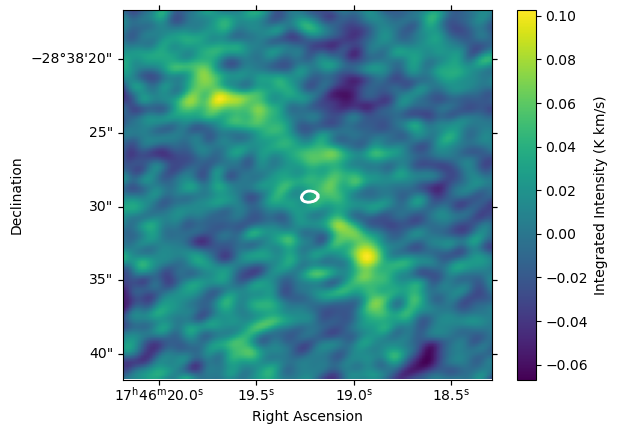

In [10]:
ax = plt.subplot(projection=mom0.wcs)
im = ax.imshow(mom0.data)
ax.contour(c1_B3.data, levels=op.percentages(c1_B3.data, nlevels=3, lower=90, upper=99), colors='white')
plt.colorbar(im, label='Integrated Intensity (K km/s)')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')